<a href="https://colab.research.google.com/github/husams/codespaces-jupyter/blob/main/Notebooks/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymc -q

In [2]:
import pymc as pm
import numpy as np

# Data
n = np.array([10, 11])
y = np.array([4, 6])
n_sample = 2


# Model
with pm.Model() as model:

    # Priors
    mu = pm.Gamma('mu', alpha=10, beta=2)
    p = pm.Beta('p', alpha=4, beta=6)

    # Likelihood
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=y)
    n_obs = pm.Poisson('n_obs', mu=mu, observed=n)

    # Inference
    trace = pm.sample(10000, chains=5)

# The trace contains the samples from the posterior distribution

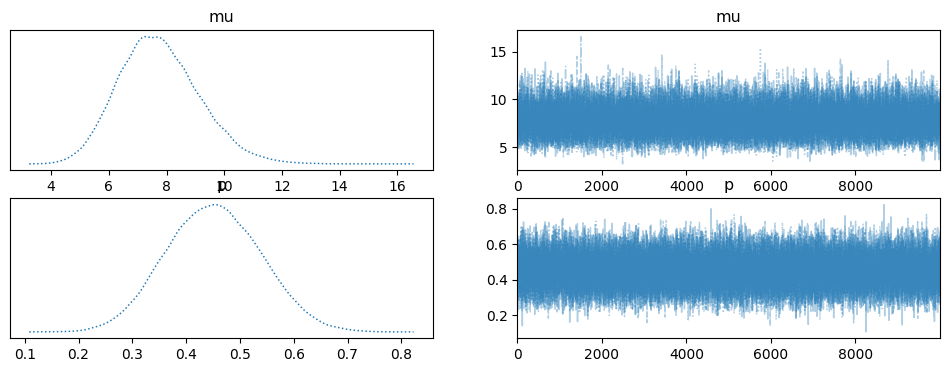

In [3]:
import arviz as az

az.plot_trace(trace, combined=True);

In [11]:
trace.posterior

<xarray.Dataset> Size: 880kB
Dimensions:  (chain: 5, draw: 10000)
Coordinates:
  * chain    (chain) int64 40B 0 1 2 3 4
  * draw     (draw) int64 80kB 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999
Data variables:
    mu       (chain, draw) float64 400kB 6.141 7.984 8.101 ... 5.865 9.055 6.585
    p        (chain, draw) float64 400kB 0.3516 0.4598 0.5853 ... 0.4371 0.3842
Attributes:
    created_at:                 2024-08-13T22:05:12.025276+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.10.4
    sampling_time:              48.84927678108215
    tuning_steps:               1000

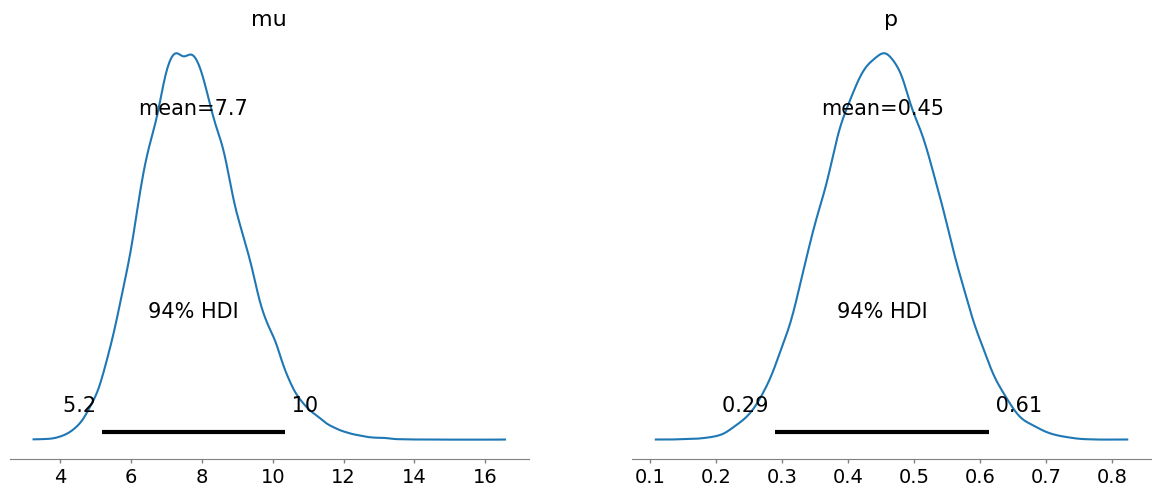

In [5]:
# prompt: display posterior distribution

az.plot_posterior(trace);


In [12]:
# prompt: Print the  mean and standard deviation for. Mu and p

# Calculate mean and standard deviation for mu and p
mu_mean = np.mean(trace.posterior['mu'])
mu_std = np.std(trace.posterior['mu'])
p_mean = np.mean(trace.posterior['p'])
p_std = np.std(trace.posterior['p'])

# Print the results
print("Mu - Mean: {:.3f}, Standard Deviation: {:.3f}".format(mu_mean, mu_std))
print("P - Mean: {:.3f}, Standard Deviation: {:.3f}".format(p_mean, p_std))


Mu - Mean: 7.748, Standard Deviation: 1.390
P - Mean: 0.451, Standard Deviation: 0.087
